In [1]:
import pandas as pd
import missingno as msno

In [2]:
df_RUS = pd.read_csv('data/results/RUS.csv')
df_RUS = df_RUS.transpose()

In [3]:
#Посмотрим на информативность данных

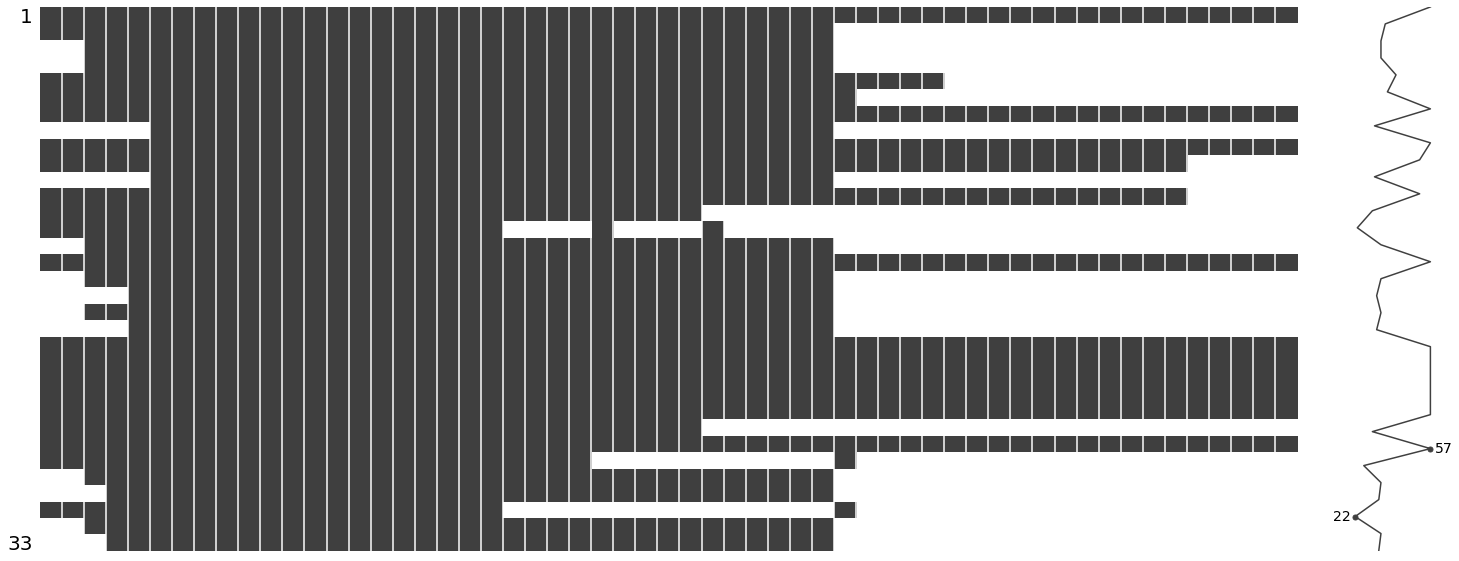

In [4]:
msno.matrix(df_RUS);


<AxesSubplot:>

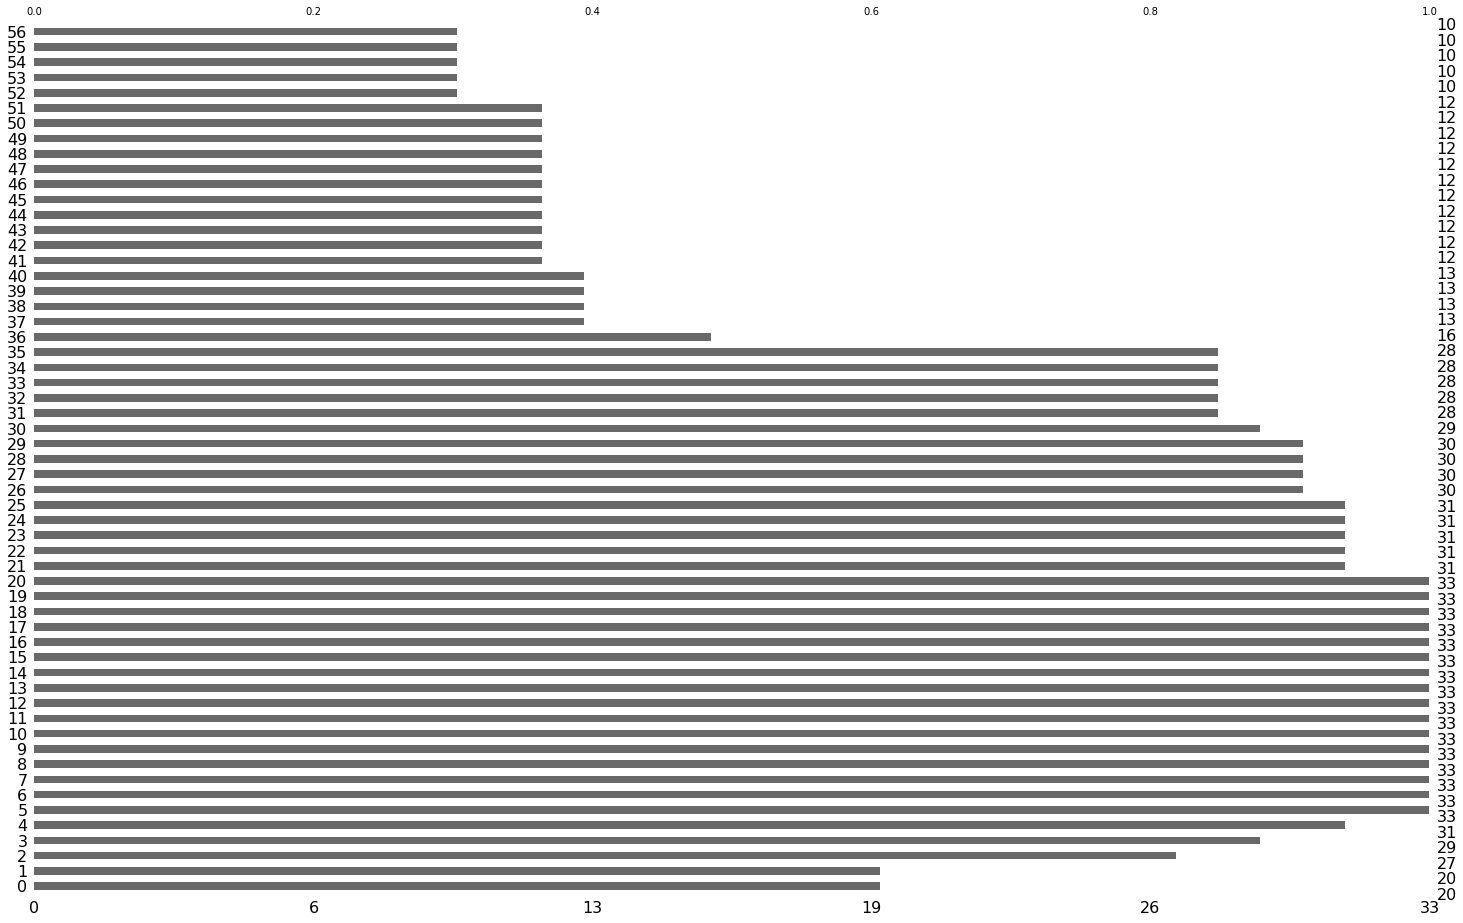

In [5]:
msno.bar(df_RUS)

In [6]:
missing_values_colums = ((df_RUS.isna().sum() / len(df_RUS)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values_colums

Процент пропущенных значений:


16     0.000000
20     0.000000
19     0.000000
18     0.000000
17     0.000000
15     0.000000
14     0.000000
13     0.000000
11     0.000000
10     0.000000
12     0.000000
8      0.000000
7      0.000000
6      0.000000
5      0.000000
9      0.000000
23     6.060606
25     6.060606
4      6.060606
21     6.060606
22     6.060606
24     6.060606
26     9.090909
27     9.090909
29     9.090909
28     9.090909
3     12.121212
30    12.121212
34    15.151515
35    15.151515
31    15.151515
32    15.151515
33    15.151515
2     18.181818
0     39.393939
1     39.393939
36    51.515152
37    60.606061
38    60.606061
39    60.606061
40    60.606061
51    63.636364
50    63.636364
49    63.636364
48    63.636364
47    63.636364
45    63.636364
44    63.636364
43    63.636364
42    63.636364
41    63.636364
46    63.636364
55    69.696970
52    69.696970
53    69.696970
54    69.696970
56    69.696970
dtype: float64

In [7]:
#Моим решением будет удалить колонки где пропущено значений больше 50%

In [8]:
#df_RUS = df_RUS.drop(columns=['1965-12-31', ''])
for key in missing_values_colums.index:
    if missing_values_colums[key] >50:
        df_RUS = df_RUS.drop(columns=[key])

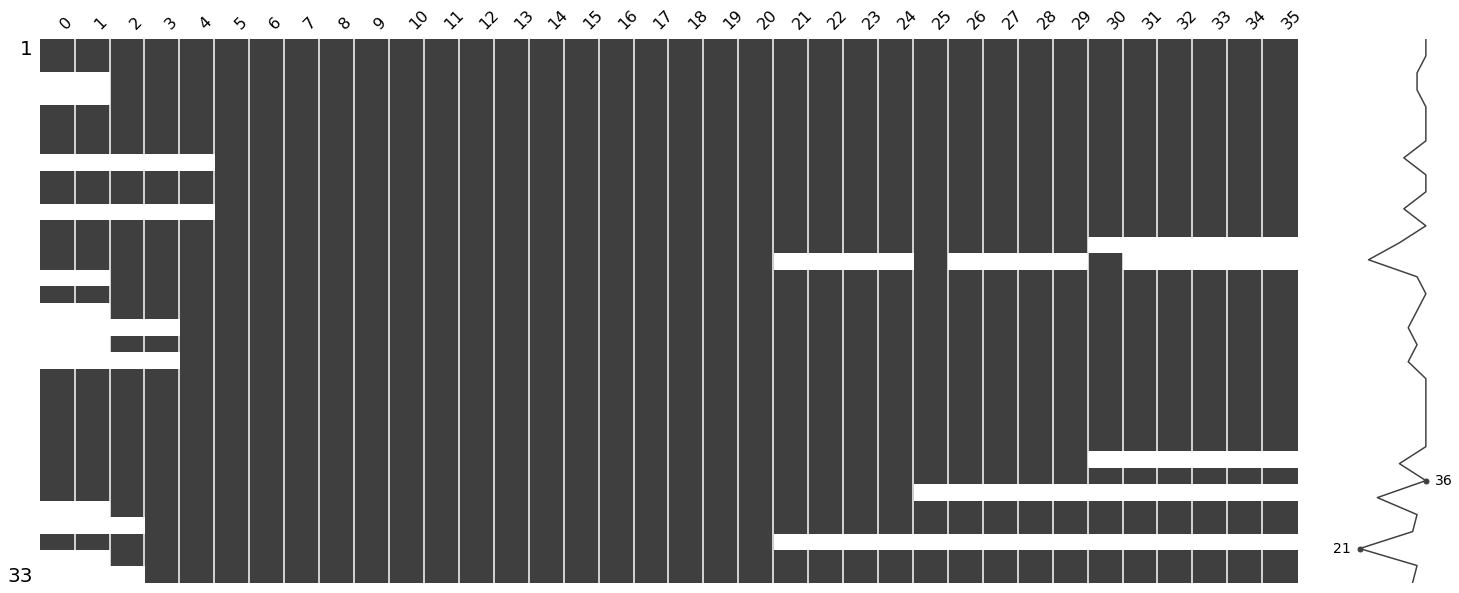

In [9]:
msno.matrix(df_RUS);

In [10]:
missing_values_index = ((df_RUS.transpose().isna().sum() / len(df_RUS)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values_index

Процент пропущенных значений:


Date                     0.000000
OIL_CONSUM_D_RUS         0.000000
OIL_CONSUM_RUS           0.000000
OIL_PROD_D_RUS           0.000000
GAS_PROD_RUS             0.000000
OIL_PROD_RUS             0.000000
GAS_PROD_D_RUS           0.000000
GEO_CONSUM_RUS           0.000000
GAS_CONSUM_RUS           0.000000
GAS_CONSUM_D_RUS         0.000000
ELEC_GEN_RUS             0.000000
COAL_PROD_RUS            0.000000
PRIMARY_CONSUM_O_RUS     0.000000
C02_EMMISSIONS_RUS       0.000000
OIL_REF_CAP_RUS          0.000000
SOLAR_CONSUM_O_RUS       6.060606
NUC_CONSUM_O_RUS         6.060606
HYDRO_CONSUM_O_RUS       6.060606
WIND_CONSUM_O_RUS        6.060606
GEO_CONSUM_O_RUS         6.060606
COAL_PROD_O_RUS          6.060606
COAL_CONSUM_O_RUS        6.060606
SOLAR_CONSUM_RUS         9.090909
WIND_CONSUM_RUS          9.090909
NUC_CONSUM_RUS          12.121212
HYDRO_CONSUM_RUS        12.121212
GAS_PROD_O_RUS          15.151515
GAS_CONSUM_O_RUS        15.151515
GAS_RESERVES_RUS        18.181818
OIL_RESERVES_R

<AxesSubplot:>

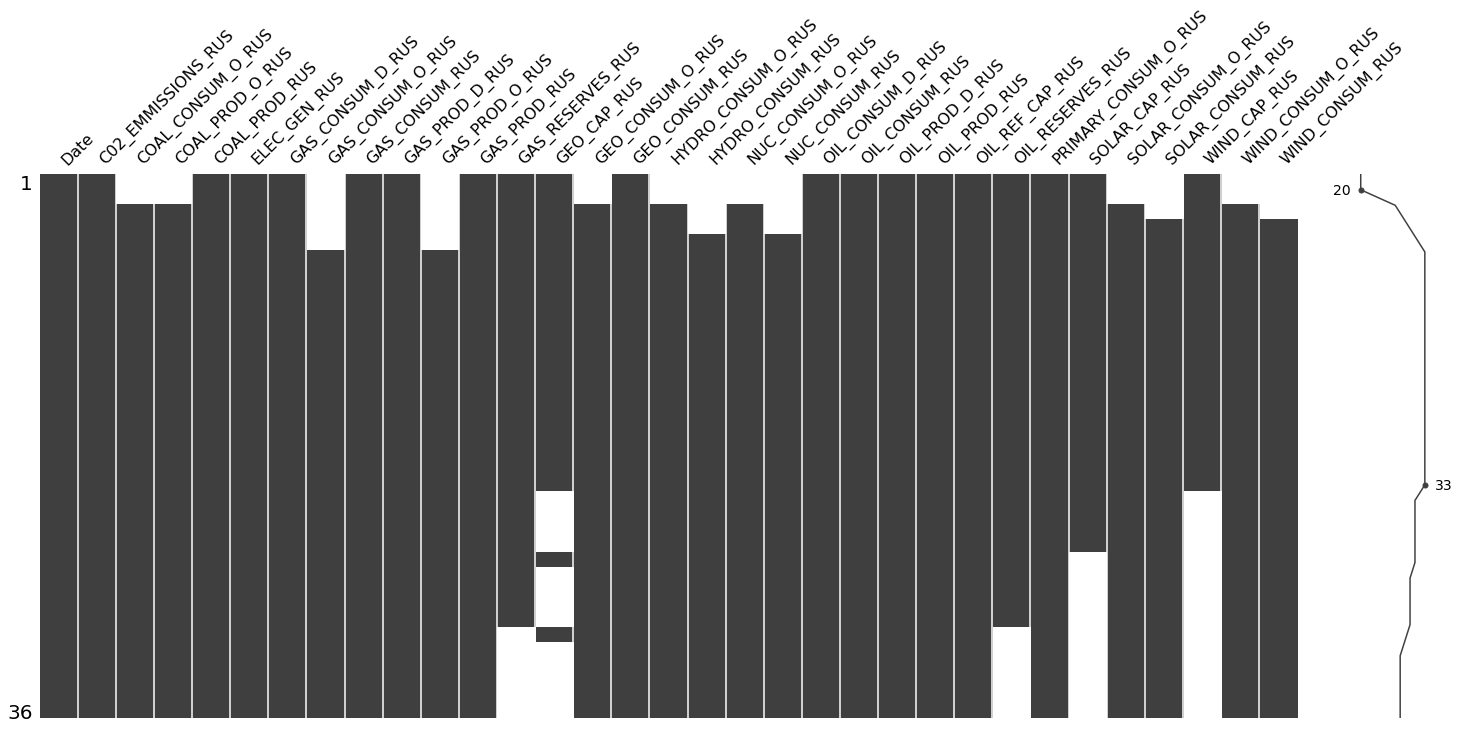

In [11]:
msno.matrix(df_RUS.transpose())

In [12]:
#пропущенные значение, после которых есть данные экстрополируем

In [13]:

nan = df_RUS.isna()
for i in range(len(df_RUS)):
    value_1 = [-1, -1]
    value_2 = [-1, -1]
    step = 0
    for j in range(5, len(df_RUS.iloc[i, :])):
        if nan.iloc[i, j]:
            if value_1[0] == -1:
                value_1[0] = df_RUS.iloc[i, j - 1]
                value_1[1] = j -1
        else:
            if value_1[0] != -1:
                value_2[0] = df_RUS.iloc[i, j]
                value_2[1] = j
                step = (value_1[0] - value_2[0]) / (value_2[1] - value_1[1] - 1)
                for k in range(value_1[1] + 1, value_2[1], 1):
                    df_RUS.iloc[i, k] = df_RUS.iloc[i, k - 1] - step
                value_1[0] = -1
                value_1[1] = -1

<AxesSubplot:>

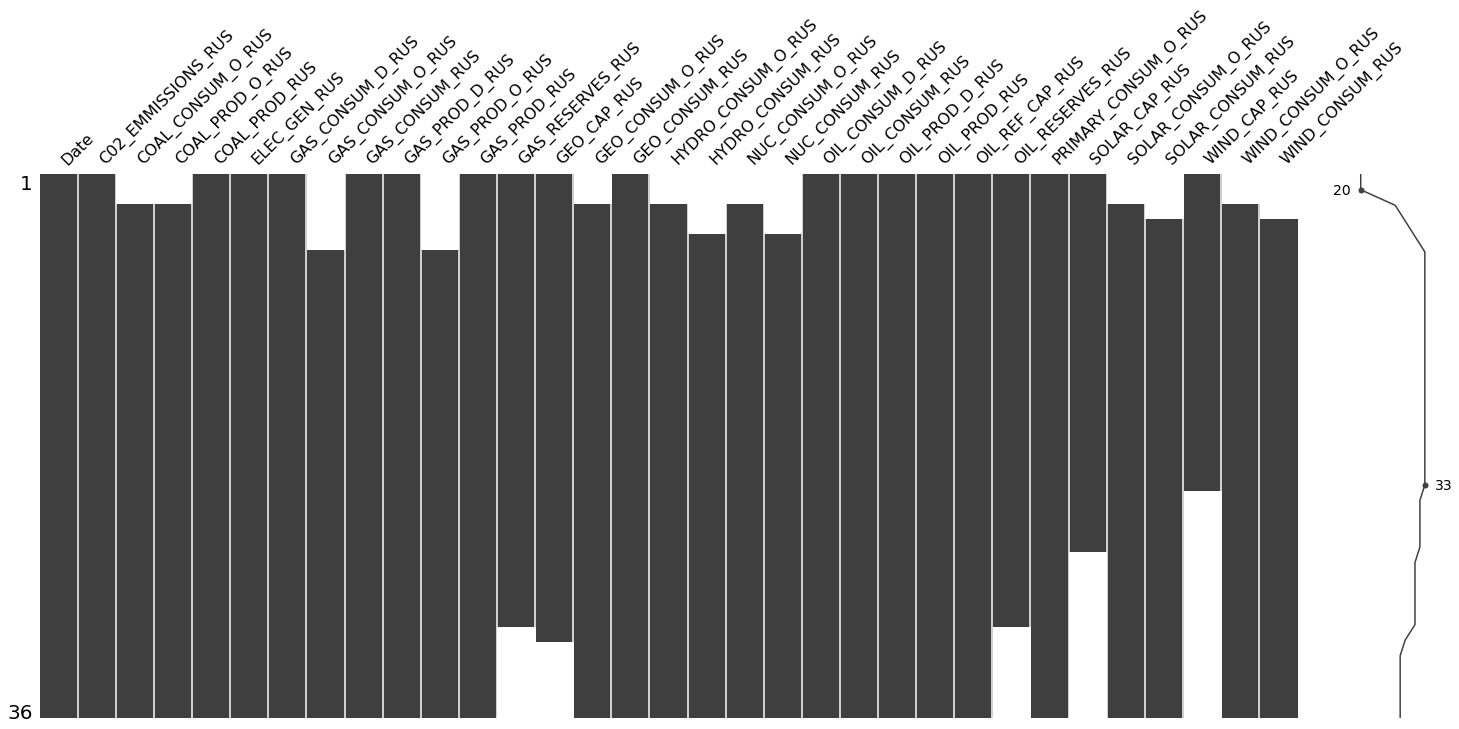

In [14]:
msno.matrix(df_RUS.transpose())

In [15]:
#Проделаем то же самое для остальных стран.

In [16]:
df_GER = pd.read_csv('data/results/GER.csv')
df_GER = df_GER.transpose()
missing_values_colums = ((df_GER.isna().sum() / len(df_GER)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values_colums

Процент пропущенных значений:


12     0.000
16     0.000
15     0.000
14     0.000
13     0.000
11     0.000
10     0.000
17     0.000
9      0.000
7      0.000
6      0.000
19     0.000
20     0.000
21     0.000
8      0.000
18     0.000
24     3.125
22     3.125
23     3.125
25     6.250
31     6.250
5      6.250
26     6.250
27     9.375
29     9.375
30     9.375
28     9.375
4     12.500
36    15.625
32    15.625
33    15.625
34    15.625
35    15.625
40    18.750
38    18.750
37    18.750
39    18.750
3     18.750
41    25.000
50    28.125
42    28.125
43    28.125
44    28.125
45    28.125
46    28.125
47    28.125
48    28.125
49    28.125
51    28.125
53    37.500
52    37.500
54    37.500
56    37.500
55    37.500
2     43.750
1     43.750
0     53.125
dtype: float64

In [17]:
for key in missing_values_colums.index:
    if missing_values_colums[key] >50:
        df_GER = df_GER.drop(columns=[key])

In [18]:
nan = df_GER.isna()
for i in range(len(df_GER)):
    value_1 = [-1, -1]
    value_2 = [-1, -1]
    step = 0
    for j in range(5, len(df_GER.iloc[i, :])):
        if nan.iloc[i, j]:
            if value_1[0] == -1:
                value_1[0] = df_GER.iloc[i, j - 1]
                value_1[1] = j -1
        else:
            if value_1[0] != -1:
                value_2[0] = df_GER.iloc[i, j]
                value_2[1] = j
                step = (value_1[0] - value_2[0]) / (value_2[1] - value_1[1] - 1)
                for k in range(value_1[1] + 1, value_2[1], 1):
                    df_GER.iloc[i, k] = df_GER.iloc[i, k - 1] - step
                value_1[0] = -1
                value_1[1] = -1

<AxesSubplot:>

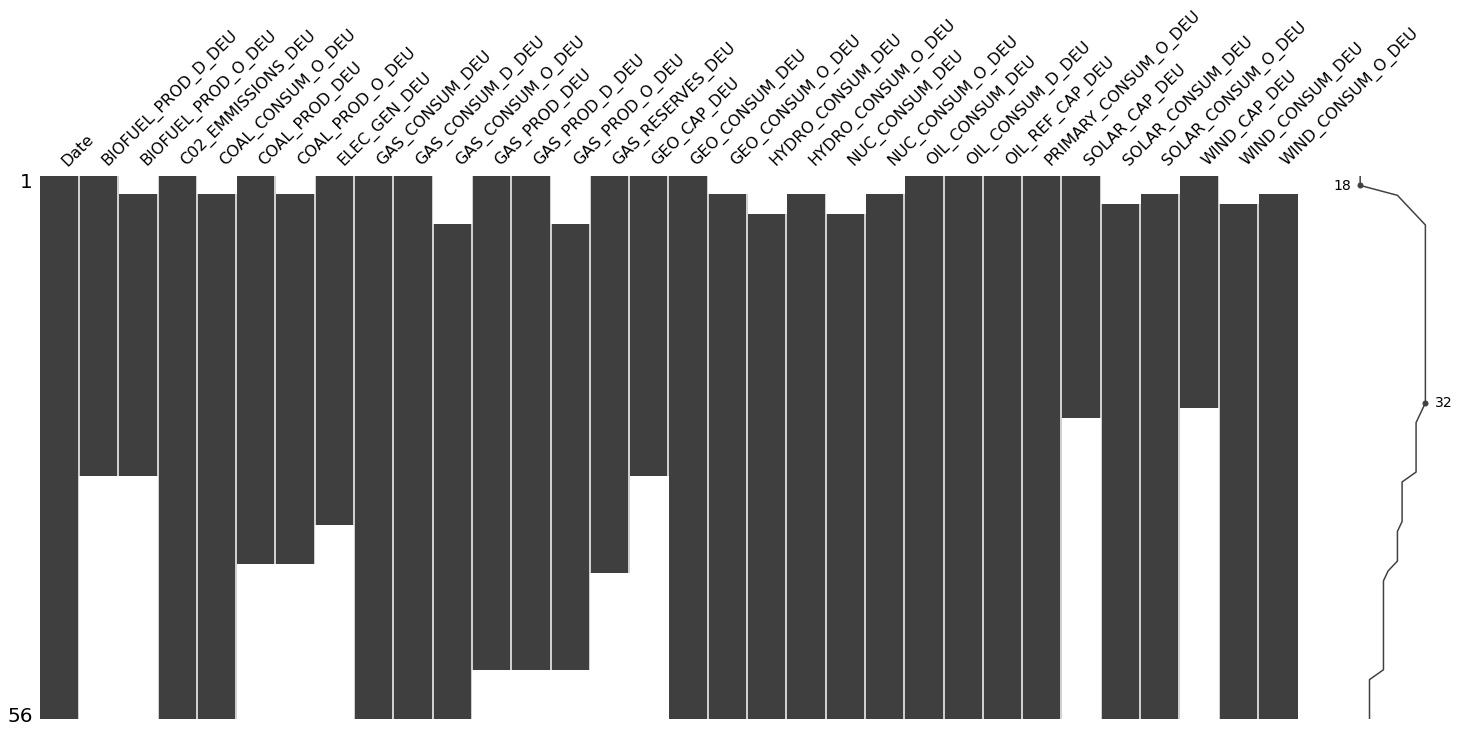

In [19]:
msno.matrix(df_GER.transpose())

In [20]:
df_CHI = pd.read_csv('data/results/GER.csv')
df_CHI = df_CHI.transpose()
missing_values_colums = ((df_CHI.isna().sum() / len(df_CHI)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values_colums

Процент пропущенных значений:


12     0.000
16     0.000
15     0.000
14     0.000
13     0.000
11     0.000
10     0.000
17     0.000
9      0.000
7      0.000
6      0.000
19     0.000
20     0.000
21     0.000
8      0.000
18     0.000
24     3.125
22     3.125
23     3.125
25     6.250
31     6.250
5      6.250
26     6.250
27     9.375
29     9.375
30     9.375
28     9.375
4     12.500
36    15.625
32    15.625
33    15.625
34    15.625
35    15.625
40    18.750
38    18.750
37    18.750
39    18.750
3     18.750
41    25.000
50    28.125
42    28.125
43    28.125
44    28.125
45    28.125
46    28.125
47    28.125
48    28.125
49    28.125
51    28.125
53    37.500
52    37.500
54    37.500
56    37.500
55    37.500
2     43.750
1     43.750
0     53.125
dtype: float64

In [21]:
for key in missing_values_colums.index:
    if missing_values_colums[key] >50:
        df_CHI = df_CHI.drop(columns=[key])

In [22]:
nan = df_CHI.isna()
for i in range(len(df_CHI)):
    value_1 = [-1, -1]
    value_2 = [-1, -1]
    step = 0
    for j in range(5, len(df_CHI.iloc[i, :])):
        if nan.iloc[i, j]:
            if value_1[0] == -1:
                value_1[0] = df_CHI.iloc[i, j - 1]
                value_1[1] = j -1
        else:
            if value_1[0] != -1:
                value_2[0] = df_CHI.iloc[i, j]
                value_2[1] = j
                step = (value_1[0] - value_2[0]) / (value_2[1] - value_1[1] - 1)
                for k in range(value_1[1] + 1, value_2[1], 1):
                    df_CHI.iloc[i, k] = df_CHI.iloc[i, k - 1] - step
                value_1[0] = -1
                value_1[1] = -1

<AxesSubplot:>

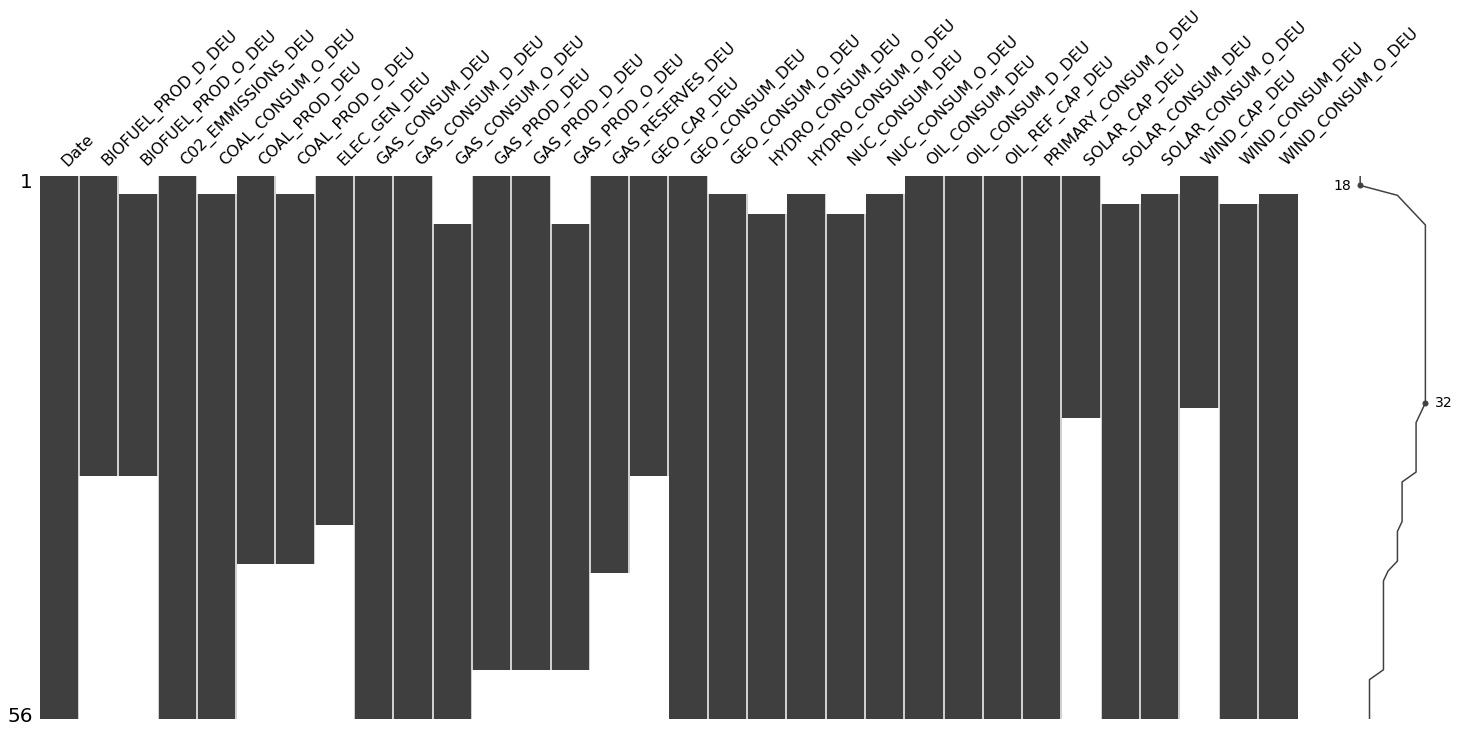

In [23]:
msno.matrix(df_CHI.transpose())

In [24]:
#так как я планирую сравнить добычу энергию в разных странах, такого заполнения будет достаточно. 
#теперь проверим данные на аномалии и выбросы

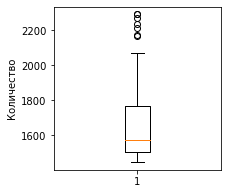

In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
df = df_RUS.transpose()
fig, ax = plt.subplots(figsize=(3, 3))
ax.boxplot(df.C02_EMMISSIONS_RUS)
ax.set_ylabel('Количество')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

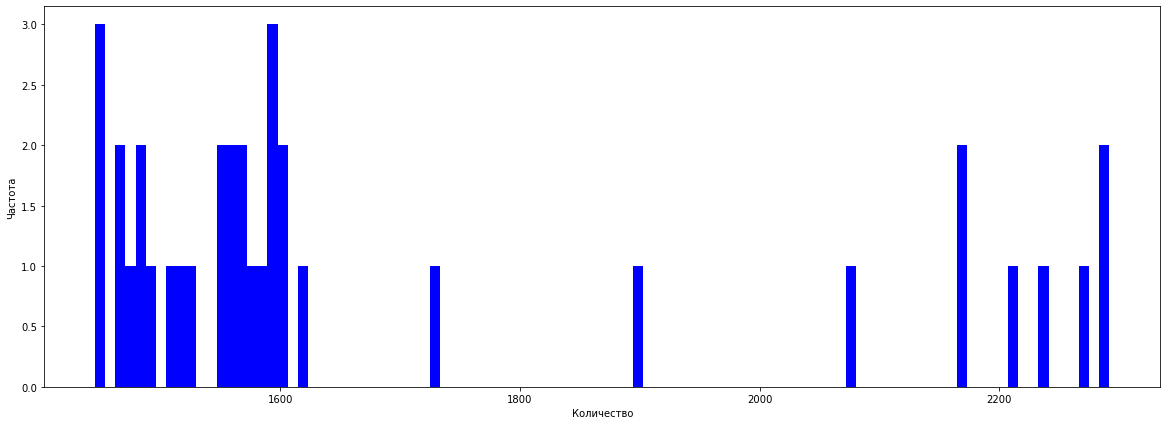

In [29]:
fig, ax = plt.subplots(figsize=(20, 7))

ax.hist(df.C02_EMMISSIONS_RUS, bins=100, color='b')
ax.set_xlabel('Количество')
ax.set_ylabel('Частота')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'));

In [33]:
#Так как данные из надежного источник и очень больших временных проммежутков, смысле фильтровать аномалии и выбросы нет
#На этом можно закончить подготовку данных

In [31]:
df_RUS = df_RUS.transpose()
df_GER = df_GER.transpose()
df_CHI = df_CHI.transpose()

In [32]:
df_RUS.to_csv('data/results/RUS_clear.csv')
df_GER.to_csv('data/results/GER_clear.csv')
df_CHI.to_csv('data/results/CHI_clear.csv')